In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 29 11:25:29 2019

@author: energise

script adjusted from SPBC to read in impedance model and graph networkx

"""
import importlib
import setup_nx
importlib.reload(setup_nx)
from setup_nx import *

import datetime
import time

#import pandas as pd
#import os.path as path


2020-03-24 10:05:26.633893
Finished initializing feeder


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

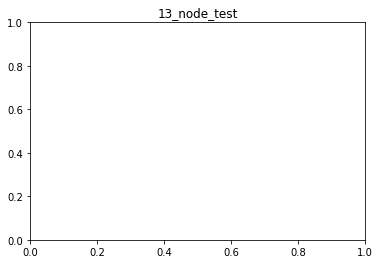

In [6]:
ts = time.time()
print()
print(datetime.datetime.fromtimestamp(ts))

# Enter the path/name of the model's excel file and import

# All GridBright load files should be in the following folder
#loadfolder = "/Users/jasperpakshong/Documents/Berkeley/ENERGISE/IEEE13/"
#loadpath = loadfolder + "IEEE13testload_w_extreme_act.xlsx"
'UNBALANCED'
# =============================================================================
# filepath = "IEEE13/"
# modelpath = filepath + "001 phasor08_IEEE13_OPAL.xls"
# 
# loadfolder = "IEEE13/"
# loadpath = loadfolder + "001_phasor08_IEEE13_norm03_HIL_7_1.xlsx"
# =============================================================================

'BALANCED'
filepath = "AL0001/"
modelpath = filepath + "AL0001_OPAL_working.xls"

loadfolder = "AL0001/"
loadpath = loadfolder + "AL0001_tvload_afternoon1h.csv"

plot = 0 #turn plot on/off

# Specify substation kV, kVA bases, and the number of timesteps in the load data
subkVbase_phg = 4.16/np.sqrt(3)
subkVAbase = 5000.
timesteps = 1

depths = {}
leaves = []

def feeder_init():
    modeldata = pd.ExcelFile(modelpath)
    actpath = loadpath
    
    # set dummy values for undefined variables
    date = datetime.datetime.now()
    month = date.month
    day = date.day
    hour = date.hour
    minute = date.minute
    #timestepcur = hour*60+minute
    timestepcur = 0
    
    Psat_nodes = []
    Qsat_nodes = []
    
    refphasor = np.ones((3,2))
    refphasor[:,0]=1
    refphasor[:,1]=[0,4*np.pi/3,2*np.pi/3]
    
    PVforecast = 0
    
    #get feeder
    feeder_init = feeder(modelpath,loadfolder,loadpath,actpath,timesteps,timestepcur,
                         subkVbase_phg,subkVAbase,refphasor,Psat_nodes,Qsat_nodes,PVforecast, depths, leaves)
    #feeder_init
    
    return feeder_init

def nx_plot(feeder):
    
    plt.title('13_node_test')
    
    pos = nx.nx_agraph.graphviz_layout(feeder.network, prog='dot')
    
    pos = nx.spectral_layout(feeder.network)
    
    nx.draw(feeder.network, pos, with_labels=True, arrows=True)
    
    plt.savefig('13_node_test.png')
    
    ### THESE ARE ADDITIONS ONLY FOR THE PL0001 FEEDER
    #feeder.network.add_edge('bus_N_300062298', 'bus_N_L_22666_sec')
    #feeder.network.add_edge('bus_N_300062062', 'bus_N_L_21316_sec')
    #feeder.network.add_edge('bus_N_300062332', 'bus_N_L_22077_sec')
    #feeder.network.add_edge('bus_N_300053280', 'bus_N_L_52586_sec')
    #feeder.network.add_edge('bus_N_300006691', 'bus_N_L_38426_sec')
    
    ### THESE ARE ADDITIONS ONLY FOR THE AL0001 FEEDER
    feeder.network.add_edge('bus_N_900081044', 'bus_N_L_87632_sec')
    feeder.network.add_edge('bus_N_900059208', 'bus_N_L_46793_sec')
    feeder.network.add_edge('bus_N_900060818', 'bus_N_L_17532_sec')
    feeder.network.add_edge('bus_N_900076500', 'bus_N_L_108238_sec')
    feeder.network.add_edge('bus_N_900059040', 'bus_N_L_111610_sec')
    feeder.network.add_edge('bus_N_900059556', 'bus_N_L_147411_sec')
    feeder.network.add_edge('bus_N_900047073', 'bus_N_L_6860_sec')
    feeder.network.add_edge('bus_N_900054239', 'bus_N_L_9709_sec')
    feeder.network.add_edge('bus_N_900056678', 'bus_N_L_110483_sec')
    feeder.network.add_edge('bus_N_900059242', 'bus_N_L_132901_sec')
    feeder.network.add_edge('bus_N_900019520', 'bus_N_L_40688_sec')
    feeder.network.add_edge('bus_N_900056622', 'bus_N_L_138443_sec')
    feeder.network.add_edge('bus_N_900059203', 'bus_N_L_108120_sec')
    feeder.network.add_edge('bus_N_900080808', 'bus_N_L_116563_sec')
    feeder.network.add_edge('bus_N_900008961', 'bus_N_L_113827_sec')
    
    nx.nx_pydot.write_dot(feeder.network, 'test_AL0001_initial2.dot')
    
    return

feeder_init = feeder_init()
print("Finished initializing feeder")
nx_plot(feeder_init)

## T.G. ~~ NEED TO CHANGE NAMES OF WHAT IS BEING PLOTTED SO YOU CAN ACTUALLY SEE THE GRAPH ##

count = 0
for i in feeder_init.network:    
    print(i)
    count += 1
    if count >= 10:
        break

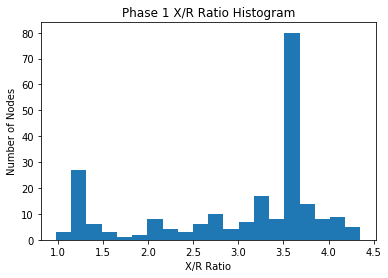

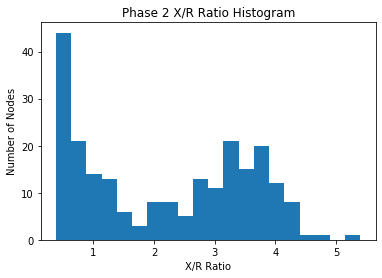

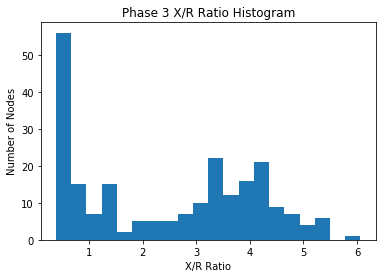

Z between buses:
Iterated 28 times to reach equal depths.
Total iterations to get to common parent is 26
Common parent is bus_N_900023620
{'Phase 1': (2.434394303346293+4.881888424072685j), 'Phase 2': (2.434394303346293+4.881888424072685j), 'Phase 3': (2.083152003673727+4.638324575153392j)}

Z to substation:
{'Phase 1': (1.4098209463865097+5.081064338962417j), 'Phase 2': (9.06985377808841+12.804292417817736j), 'Phase 3': (9.06985377808841+12.804292417817736j)}

X/R ratio of path to substation:
{'Phase 1': 3.6040494021496947, 'Phase 2': 0.5602145815445899, 'Phase 3': 0.5602145815445899}


In [6]:
import matplotlib.pyplot as plt

#Notes on the following two methods:
#1) Does not account for the presence of artifically added transformer windings, because I would have to separate out
#the line impedance information
#2) Will not function properly if there are cycles
#3) Assumes that switches and transformers have zero impedance; the latter case is due to unit discrepancy: transformer
#impedances use PU, line impedances use Ohms

slack_bus = None
for bus_name, depth in depths.items():
    if depth == 0:
        slack_bus = bus_name
        break

def get_total_impedance_from_substation(feeder, node_name):
    node_name_full = "bus_" + node_name
    #Notice that since this is a tree, any node will only have at most one predecessor
    total_impedance = {'Phase 1' : 0.0, 'Phase 2' : 0.0, 'Phase 3' : 0.0}
    
    current_node = node_name_full
    pred_list = None
    
    try:
        pred_list = list(feeder.network.predecessors(node_name_full))
    except nx.NetworkXError:
        print("Bus with name " + current_node + " does not exist in the feeder.")
        return 0
    
    iter_depth = depths[current_node]
    
    for _ in range(iter_depth):
        #pred_list[0] is the parent node
        impedance = feeder.network.get_edge_data(pred_list[0], current_node, default=None)['connector']
        #print("Type is " + str(type(impedance)))
        if impedance == None:
            print("WARNING: No connection between nodes " + str(pred_list[0]) + " and " + str(current_node) + ".")
            return 0
        else:
            imp_dict = impedance.Z if isinstance(impedance, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict[0][0]
            total_impedance['Phase 2'] += imp_dict[1][1]
            total_impedance['Phase 3'] += imp_dict[2][2]
            
            current_node = pred_list[0]
            pred_list = list(feeder.network.predecessors(current_node))
    
    return total_impedance

#Method will return a the distance sum of impedances to a common bus upstream if the two buses are not along the
#the same path. For example:
#     A      Calculating total impedance between B and C yields Z_AB + Z_CA
#    / \
#   B   C

def get_total_impedance_between_two_buses(feeder, node_name_1, node_name_2):
    bus_1 = "bus_" + node_name_1
    bus_2 = "bus_" + node_name_2
    
    total_impedance = {'Phase 1' : 0.0, 'Phase 2' : 0.0, 'Phase 3' : 0.0}
    
    depth_1 = 0
    depth_2 = 0
    
    try:
        depth_1 = depths[bus_1]
        depth_2 = depths[bus_2]
    except KeyError:
        print("Either the first bus, " + bus_1 + ", or the second bus, " + bus_2 + " is not a valid bus in the feeder.")
        return 0
    
    depth_dif = abs(depth_1 - depth_2)
    
    max_depth_bus = bus_1 if depth_1 > depth_2 else bus_2
    min_depth_bus = bus_1 if max_depth_bus == bus_2 else bus_2
    
    pred_list_max = list(feeder.network.predecessors(max_depth_bus))
    pred_list_min = list(feeder.network.predecessors(min_depth_bus))
    
    for i in range(depth_dif):
        
        impedance = feeder.network.get_edge_data(pred_list_max[0], max_depth_bus, default=None)['connector']
        if impedance == None:
            print("WARNING: No connection between nodes " + str(pred_list_max[0]) + " and " + str(max_depth_bus) + ".")
            return 0
        else:
            imp_dict = impedance.Z if isinstance(impedance, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict[0][0]
            total_impedance['Phase 2'] += imp_dict[1][1]
            total_impedance['Phase 3'] += imp_dict[2][2]
            
            #Case of where we the two buses are directly linked by purely upstream connections, allowing us to
            #terminate our calculations earlier
            if pred_list_max[0] == min_depth_bus:
                print("Iterated " + str(i+1) + " times to get direct upstream connection total impedance.")
                return total_impedance
            
            max_depth_bus = pred_list_max[0]
            pred_list_max = list(feeder.network.predecessors(max_depth_bus))
            
    assert(depths[max_depth_bus] == depths[min_depth_bus])
    
    print("Iterated " + str(depth_dif) + " times to reach equal depths.")
    
    common_parent = pred_list_max[0] == pred_list_min[0]
    
    count_get_to_common = 0
    
    #Here, we simultaneously shift both buses (after the max depth bus has been shifted to be of equal depth to the min
    #depth bus) to a point where the parent bus is shared
    while not common_parent:
        count_get_to_common += 1
        
        impedance_bus_min = feeder.network.get_edge_data(pred_list_min[0], min_depth_bus, default=None)['connector']
        if impedance_bus_min == None:
            print("WARNING: No connection between nodes " + str(pred_list_min[0]) + " and " + str(min_depth_bus) + ".")
            return 0
        else:
            imp_dict_min = impedance_bus_min.Z if isinstance(impedance_bus_min, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict_min[0][0]
            total_impedance['Phase 2'] += imp_dict_min[1][1]
            total_impedance['Phase 3'] += imp_dict_min[2][2]
            
            min_depth_bus = pred_list_min[0]
            pred_list_min = list(feeder.network.predecessors(min_depth_bus))
            
        impedance_bus_max = feeder.network.get_edge_data(pred_list_max[0], max_depth_bus, default=None)['connector']
        if impedance_bus_max == None:
            print("WARNING: No connection between nodes " + str(pred_list_max[0]) + " and " + str(max_depth_bus) + ".")
            return 0
        else:
            imp_dict_max = impedance_bus_max.Z if isinstance(impedance_bus_max, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict_max[0][0]
            total_impedance['Phase 2'] += imp_dict_max[1][1]
            total_impedance['Phase 3'] += imp_dict_max[2][2]
            
            max_depth_bus = pred_list_max[0]
            pred_list_max = list(feeder.network.predecessors(max_depth_bus))
            
        common_parent = pred_list_max[0] == pred_list_min[0]
    
    print("Total iterations to get to common parent is " + str(count_get_to_common))
    print("Common parent is " + str(pred_list_max[0]))
    
    #Need to iterate one more time to account for "joining" node
    impedance_bus_min = feeder.network.get_edge_data(pred_list_min[0], min_depth_bus, default=None)['connector']
    if impedance_bus_min == None:
        print("WARNING: No connection between nodes " + str(pred_list_min[0]) + " and " + str(min_depth_bus) + ".")
        return 0
    else:
        imp_dict_min = impedance_bus_min.Z if isinstance(impedance_bus_min, line) else np.zeros((3,3))

        total_impedance['Phase 1'] += imp_dict_min[0][0]
        total_impedance['Phase 2'] += imp_dict_min[1][1]
        total_impedance['Phase 3'] += imp_dict_min[2][2]

    impedance_bus_max = feeder.network.get_edge_data(pred_list_max[0], max_depth_bus, default=None)['connector']
    if impedance_bus_max == None:
        print("WARNING: No connection between nodes " + str(pred_list_max[0]) + " and " + str(max_depth_bus) + ".")
        return 0
    else:
        imp_dict_max = impedance_bus_max.Z if isinstance(impedance_bus_max, line) else np.zeros((3,3))

        total_impedance['Phase 1'] += imp_dict_max[0][0]
        total_impedance['Phase 2'] += imp_dict_max[1][1]
        total_impedance['Phase 3'] += imp_dict_max[2][2]
        
    return total_impedance
    
#Returns the X/R ratio from a node up to the substation       
def get_XR_ratio(feeder, node_name):
    impedances_per_phase = get_total_impedance_from_substation(feeder, node_name)
    
    p1_z = impedances_per_phase['Phase 1']
    p2_z = impedances_per_phase['Phase 2']
    p3_z = impedances_per_phase['Phase 3']

    p1_xr = np.imag(p1_z) / np.real(p1_z) 
    p2_xr = np.imag(p1_z) / np.real(p2_z)
    p3_xr = np.imag(p1_z) / np.real(p3_z)
    
    return {'Phase 1' : p1_xr, 'Phase 2' : p2_xr, 'Phase 3' : p3_xr}

def plot_histogram_XR_ratios(feeder, leaves_only=False):
    nodes_to_use = leaves if leaves_only else list(feeder.network.nodes)
    
    #PL0001 Case
    #lst_remove = ['bus_N_L_22666_sec', 'bus_N_L_21316_sec', 'bus_N_L_22077_sec', 
                  #'bus_N_L_52586_sec', 'bus_N_L_38426_sec', slack_bus]
    #AL0001 Case
    lst_remove = ['bus_N_L_87632_sec', 'bus_N_L_46793_sec', 'bus_N_L_17532_sec',
                 'bus_N_L_108238_sec', 'bus_N_L_111610_sec', 'bus_N_L_147411_sec',
                 'bus_N_L_6860_sec', 'bus_N_L_9709_sec', 'bus_N_L_110483_sec',
                 'bus_N_L_132901_sec', 'bus_N_L_40688_sec', 'bus_N_L_138443_sec',
                 'bus_N_L_108120_sec', 'bus_N_L_116563_sec', 'bus_N_L_113827_sec', slack_bus]
    
    nodes_to_use = [nd for nd in nodes_to_use if nd not in lst_remove]
    
    XR_ratios_all = [get_XR_ratio(feeder, node_name[4:]) for node_name in nodes_to_use]
    
    phase_1_XR_ratios = [phase_dct['Phase 1'] for phase_dct in XR_ratios_all]
    phase_2_XR_ratios = [phase_dct['Phase 2'] for phase_dct in XR_ratios_all]
    phase_3_XR_ratios = [phase_dct['Phase 3'] for phase_dct in XR_ratios_all]
    
    plt.title("Phase 1 X/R Ratio Histogram")
    plt.xlabel("X/R Ratio")
    plt.ylabel("Number of Nodes")
    plt.hist(phase_1_XR_ratios, bins=20)
    plt.savefig('AL0001_XRhist_phA.png') # modify for each feeder
    plt.show() # need to savefig before plt.show

    plt.title("Phase 2 X/R Ratio Histogram")
    plt.xlabel("X/R Ratio")
    plt.ylabel("Number of Nodes")
    plt.hist(phase_2_XR_ratios, bins=20)
    plt.savefig('AL0001_XRhist_phB.png') # modify for each feeder
    plt.show()
    
    plt.title("Phase 3 X/R Ratio Histogram")
    plt.xlabel("X/R Ratio")
    plt.ylabel("Number of Nodes")
    plt.hist(phase_3_XR_ratios, bins=20)
    plt.savefig('AL0001_XRhist_phC.png') # modify for each feeder
    plt.show()

# -------------------- now we call functions: ---------------------------------------------
# modify node names when change feeders
plot_histogram_XR_ratios(feeder_init, leaves_only = True)
print('Z between buses:')
print(get_total_impedance_between_two_buses(feeder_init, 'N_900060821', 'N_900036537'))
print('\nZ to substation:')
print(get_total_impedance_from_substation(feeder_init, 'N_900054244'))
print('\nX/R ratio of path to substation:')
print(get_XR_ratio(feeder_init, 'N_900054244'))
# should check on how to format the printing do that it's to like 2 decimal places


In [ ]:
# See pseudocode doc for more complete descriptions of each method:
# https://docs.google.com/document/d/1VdYNN96FhywGcb0QNml61C8GLlIXbs8bU1Bh2cINPt0/edit
        
def markActLoc(graph, act_loc):
    graph.nodes[act_loc]['style'] = 'filled'
    graph.nodes[act_loc]['fillcolor'] = 'turquoise'
    return
        
def markFeas(feas, perf_loc, graph):
    graph.nodes[perf]['style'] = 'filled'
   
    if feas:
        graph.nodes[perf]['fillcolor'] = 'green'
    else:
        graph.nodes[perf]['fillcolor'] = 'red'
    return
        
def runHeatMapProcess(network, all_act_locs):
    a = 1
    
    while a <= len(all_act_locs):
        cur_act_locs = all_act_locs[0:a]
        graph = nx_plot(network)
        
        for act in cur_act_locs:
            markActLoc(graph, act)
            
        perf_nodes = []
        for n in graph.nodes:
            if n not in act_locs:
                perf_nodes.append(n)
    
        for perf in perf_nodes:
            feas = ComputeFeas(network, act_locs, perf)
            markFeas(feas, perf, graph)
        a += 1
    return
        
def updateActLoc():
def computeFeas():
        
#-----------------------------------------------
# Other methods will define in next stage
def detControlMatExistence():
def detLznRange():
def updateStateSpace();
def computeZeff();